# Python calculation to be made with the normalized spectra

(Note: because the data are quite big, the full loops will be run Star?)


## 0 Packages and data

In [1]:
path='G:/Shared drives/BeStarsMiMeS/UpdatedFiles/' #Patrick's google file stream path

In [2]:
import LSDpy.lsdpy as lsdpy

In [3]:
import specpolFlow as pol
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
from matplotlib.backends.backend_pdf import PdfPages

In [4]:
import pandas as pd
sheet_id = '1M6y1Wnsrc-w5FjUMfKaSFa_-foIDAaMe8W4lYNWnWyk'
sheet_name = 'Stars'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
StarData=pd.read_csv(url)

sheet_name = 'Observations'
url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'
Observations=pd.read_csv(url)

In [5]:
import itertools

### This gets rid of the warnings in the cells where it is creating more than 20 figures (i.e. 1.2)
#### Not needed for this notebook but could be useful in the future
#import warnings
#warnings.filterwarnings("default", message="More than 20 figures have been opened.")


## 1. Verifying the listed vsini

### 1.1 Demo with a single observation

In [6]:
star = 'hd6226'
vsini = 120.0
vradCorrected = -70.0 *u.km/u.s

#star = 'hd7636'
#vsini = 230.0
#vradCorrected = 0 * u.km/u.s

file = '{}00-InputMaterial/NormalizedSpectra/{}_1.s'.format(path,star)
data = pol.read_spectrum(file)

print(data.wl)

[ 369.683   369.6853  369.6876 ... 1048.0935 1048.0988 1048.1039]


Text(0.5, 1.0, 'hd6226 observation 1 HeI')

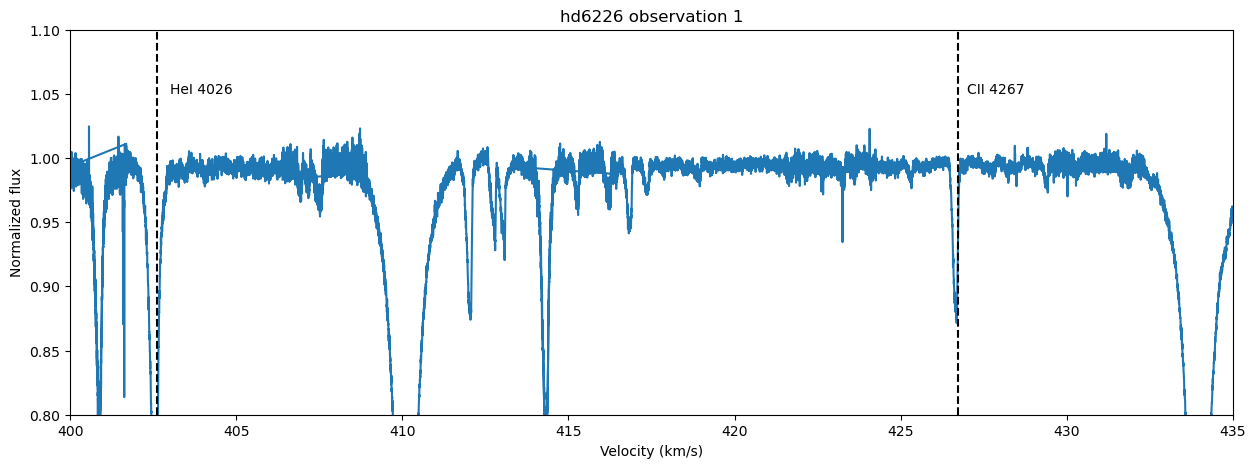

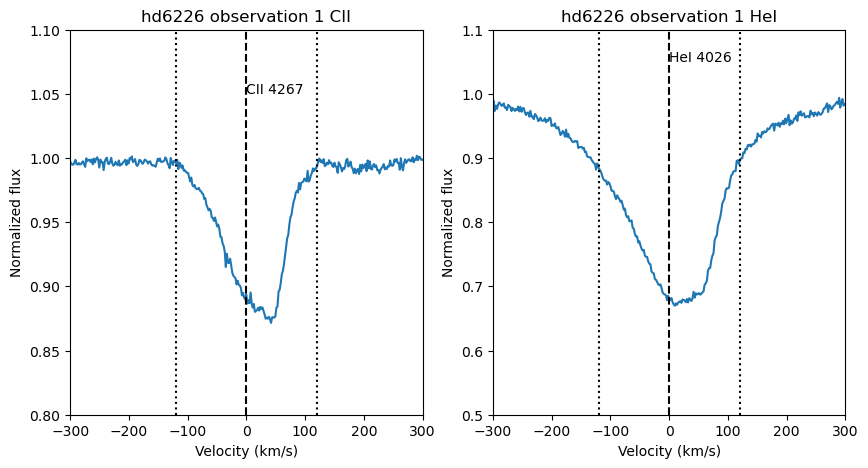

In [7]:
CII = 426.726 *u.nm
HeI =  402.6199 *u.nm

fig, ax = plt.subplots(1,1, figsize=(15,5))

ax.plot(data.wl, data.specI)
ax.set_xlim(400,435)
ax.set_ylim(0.8, 1.1)
ax.axvline(x=CII.value, c='k', ls='--')
ax.text(427, 1.05, 'CII 4267')
ax.axvline(x=HeI.value, c='k', ls='--')
ax.text(403, 1.05, 'HeI 4026')
ax.set_xlabel('Velocity (km/s)')
ax.set_ylabel('Normalized flux')
ax.set_title('{} observation 1'.format(star))

fig, ax = plt.subplots(1,2, figsize=(10,5))

vel = ((data.wl*u.nm - CII)/CII * const.c).to(u.km/u.s)
ax[0].plot(vel-vradCorrected, data.specI)
ax[0].set_xlim(-300,300)
ax[0].set_ylim(0.8, 1.1)
ax[0].axvline(x=0, c='k', ls='--')
ax[0].axvline(x=vsini, c='k', ls='dotted')
ax[0].axvline(x=-1*vsini, c='k', ls='dotted')
ax[0].text(0, 1.05, 'CII 4267')
ax[0].set_xlabel('Velocity (km/s)')
ax[0].set_ylabel('Normalized flux')
ax[0].set_title('{} observation 1 CII'.format(star))

vel2 = ((data.wl*u.nm - HeI)/HeI * const.c).to(u.km/u.s)
ax[1].plot(vel2-vradCorrected, data.specI)
ax[1].set_xlim(-300,300)
ax[1].set_ylim(0.5, 1.1)
ax[1].axvline(x=0, c='k', ls='--')
ax[1].axvline(x=vsini, c='k', ls='dotted')
ax[1].axvline(x=-1*vsini, c='k', ls='dotted')
ax[1].text(0, 1.05, 'HeI 4026')
ax[1].set_xlabel('Velocity (km/s)')
ax[1].set_ylabel('Normalized flux')
ax[1].set_title('{} observation 1 HeI'.format(star))


### 1.2 Loop over all star

**TODO**: Make a loop over all the stars. For each star, we want the two plots above on a single page, in a PDF that has one page per star. **Only use the first observation for each star.** 

I have hardcoded the values for the name of the star, vsini, and vrad for the demostration. But in the loop, you want to take the information from the spreadsheet read into the Panda data frame. 

In [9]:
%%capture
# Code by Dax Moraes and Marisol Catalan Olais 
with PdfPages('{}10-Spectra-Data-vs-hybrid-plots and Halpha and Tess/NormalizedSpectra_CII_dataonly.pdf'.format(path)) as pdf:

  for j, StarInfo in StarData.iterrows():
    star = StarInfo['Name']

    if StarInfo['vsini-estimate']=='very bad' or np.isnan(StarInfo['vsini-estimate']):
      vsini = StarInfo["Adopted-vsini"]
    else:
      vsini = StarInfo['vsini-estimate']

    ObsInfo = Observations.loc[Observations["NameAsif"] == star + '_1'] # this only accounts for the first observation of a star, which is in the "NameAsif" column
   
    for i, row in ObsInfo.iterrows():
      Vrad =  float(row["Unnamed: 11"]) * u.km/u.s

    star = StarInfo['Name']

    file = '{}00-InputMaterial/NormalizedSpectra/{}_1.s'.format(path,star)
    data = pol.read_spectrum(file)


    CII = 426.726 *u.nm
    HeI =  402.6199 *u.nm

    from matplotlib.pyplot import figure

    fig=figure(figsize=(15, 10), dpi=80)


    plt.subplot(2,1,1)
    plt.plot(data.wl, data.specI)
    plt.xlim(400,435)
    plt.ylim(0.8, 1.1)
    plt.axvline(x=CII.value, c='k', ls='--')
    plt.text(427, 1.05, 'CII 4267')
    plt.axvline(x=HeI.value, c='k', ls='--')
    plt.text(403, 1.05, 'HeI 4026')
    plt.xlabel('Velocity (km/s)')
    plt.ylabel('Normalized flux')
    plt.title('{} observation 1'.format(star))

    plt.subplot(2,2,3)
    vel = ((data.wl*u.nm - CII)/CII * const.c).to(u.km/u.s)
    plt.plot(vel-Vrad, data.specI)
    plt.xlim(-vsini-100,vsini+100)
    plt.ylim(0.8, 1.1)
    plt.axvline(x=0, c='k', ls='--')
    plt.axvline(x=vsini, c='k', ls='dotted')
    plt.axvline(x=-1*vsini, c='k', ls='dotted')
    plt.text(0, 1.05, 'CII 4267')
    plt.xlabel('Velocity (km/s)')
    plt.ylabel('Normalized flux')
    plt.title('{} observation 1 CII'.format(star))

    plt.subplot(2,2,4)
    vel2 = ((data.wl*u.nm - HeI)/HeI * const.c).to(u.km/u.s)
    plt.plot(vel2-Vrad, data.specI)
    plt.xlim(-vsini-100,vsini+100)
    plt.ylim(0.5, 1.1)
    plt.axvline(x=0, c='k', ls='--')
    plt.axvline(x=vsini, c='k', ls='dotted')
    plt.axvline(x=-1*vsini, c='k', ls='dotted')
    plt.text(0, 1.05, 'HeI 4026')
    plt.xlabel('Velocity (km/s)')
    plt.ylabel('Normalized flux')
    plt.title('{} observation 1 HeI'.format(star))


    
    plt.rcParams.update({'figure.max_open_warning': 0})

    pdf.savefig(fig)

## 2. Compare Gregg's model to the real data

### 2.1 Demo with a single observation

In [10]:
def read_disk(file):
  '''
  Read a synthetic spectrum from a s3div output

  :param file: The filename
  :rtype: wave, flux -- the wavelength in nm, and the normalized flux. 
  '''
  with open(file) as f:
    lines = f.readlines()
  # number of atomic lines in the header of the file
  natomic = int(lines[0].split(sep='-')[0])
  nwave=int(lines[natomic+1].split()[0])
  data = np.genfromtxt(lines[natomic+2:natomic+1+nwave])
  return(data[:,0]/10.0, data[:,1])

In [12]:
star = 'hd6226'
vsini = 120.0
vradCorrected = -70.0 *u.km/u.s

#star = 'hd7636'
#vsini = 230.0
#vradCorrected = 0 * u.km/u.s

file = '{}00-InputMaterial/NormalizedSpectra/{}_1.s'.format(path,star)
data = pol.read_spectrum(file)

#file = 'RanNoise/{}_1_ran_noise'.format(star)
#model = pol.iolsd.read_spectrum(file)

file = '{}01-Synth-calculations/Synth-hybrid-spectra/{}_1_noise.s'.format(path,star)
synth = pol.read_spectrum(file)

Text(0.5, 1.0, 'hd6226 observation 1 HeI')

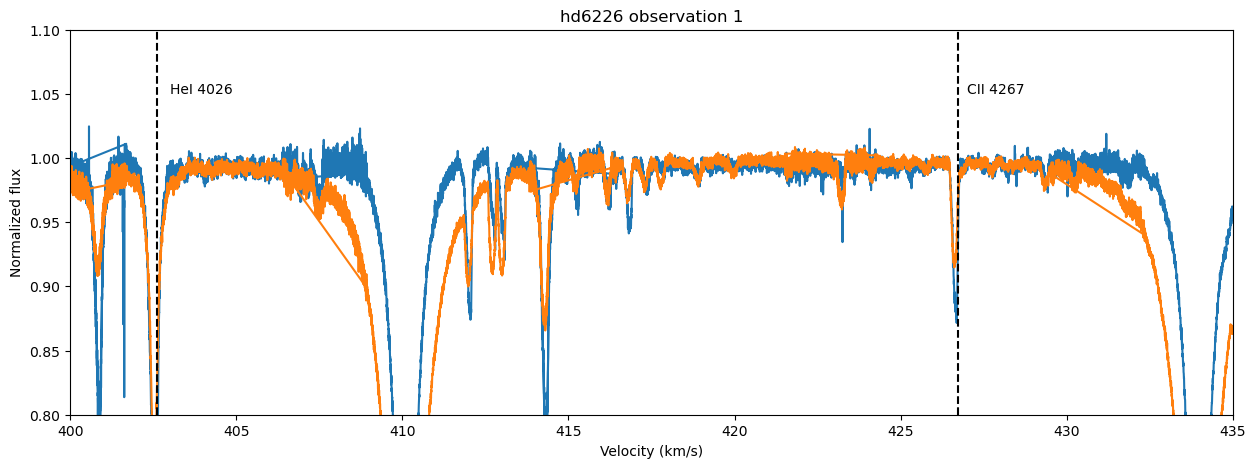

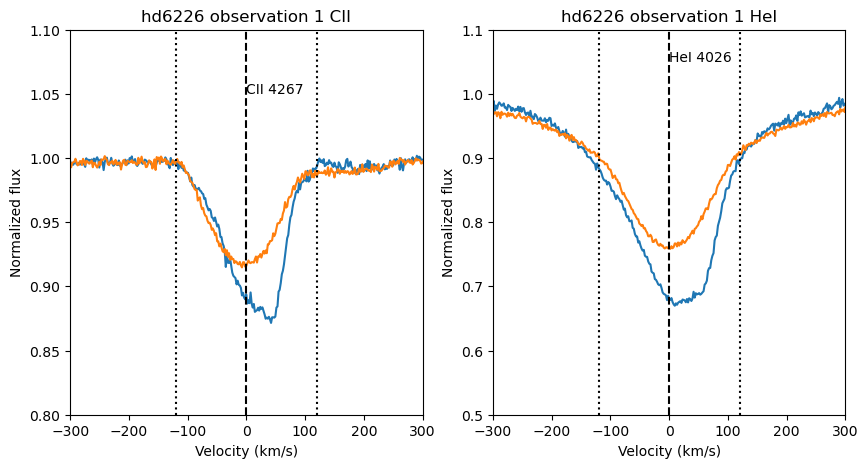

In [13]:
CII = 426.726 *u.nm
HeI =  402.6199 *u.nm

fig, ax = plt.subplots(1,1, figsize=(15,5))

ax.plot(data.wl, data.specI)
ax.plot(synth.wl, synth.specI)
ax.set_xlim(400,435)
ax.set_ylim(0.8, 1.1)
ax.axvline(x=CII.value, c='k', ls='--')
ax.text(427, 1.05, 'CII 4267')
ax.axvline(x=HeI.value, c='k', ls='--')
ax.text(403, 1.05, 'HeI 4026')
ax.set_xlabel('Velocity (km/s)')
ax.set_ylabel('Normalized flux')
ax.set_title('{} observation 1'.format(star))

fig, ax = plt.subplots(1,2, figsize=(10,5))

vel = ((data.wl*u.nm - CII)/CII * const.c).to(u.km/u.s)
ax[0].plot(vel-vradCorrected, data.specI)
vel = ((synth.wl*u.nm - CII)/CII * const.c).to(u.km/u.s)
ax[0].plot(vel-vradCorrected, synth.specI)
ax[0].set_xlim(-300,300)
ax[0].set_ylim(0.8, 1.1)
ax[0].axvline(x=0, c='k', ls='--')
ax[0].axvline(x=vsini, c='k', ls='dotted')
ax[0].axvline(x=-1*vsini, c='k', ls='dotted')
ax[0].text(0, 1.05, 'CII 4267')
ax[0].set_xlabel('Velocity (km/s)')
ax[0].set_ylabel('Normalized flux')
ax[0].set_title('{} observation 1 CII'.format(star))

vel2 = ((data.wl*u.nm - HeI)/HeI * const.c).to(u.km/u.s)
ax[1].plot(vel2-vradCorrected, data.specI)
vel2 = ((synth.wl*u.nm - HeI)/HeI * const.c).to(u.km/u.s)
ax[1].plot(vel2-vradCorrected, synth.specI)

ax[1].set_xlim(-300,300)
ax[1].set_ylim(0.5, 1.1)
ax[1].axvline(x=0, c='k', ls='--')
ax[1].axvline(x=vsini, c='k', ls='dotted')
ax[1].axvline(x=-1*vsini, c='k', ls='dotted')
ax[1].text(0, 1.05, 'HeI 4026')
ax[1].set_xlabel('Velocity (km/s)')
ax[1].set_ylabel('Normalized flux')
ax[1].set_title('{} observation 1 HeI'.format(star))


### 2.2 Loop over all star

**TODO**: Make a loop over all the stars. For each star, we want the two plots above on a single page, in a PDF that has one page per star. **Only use the first observation for each star.** 

I have hardcoded the values for the name of the star, vsini, and vrad for the demostration. But in the loop, you want to take the information from the spreadsheet read into the Panda data frame. 

In [15]:
%%capture
# Code by Dax Moraes and Marisol Catalan Olais 
with PdfPages('{}10-Spectra-Data-vs-hybrid-plots and Halpha and Tess/NormalizedSpectra_CII_DataVSsynth.pdf'.format(path)) as pdf:

  for j, StarInfo in StarData.iterrows():
    star = StarInfo['Name']

    if StarInfo['vsini-estimate']=='very bad' or np.isnan(StarInfo['vsini-estimate']):
      vsini = StarInfo["Adopted-vsini"]
    else:
      vsini = StarInfo['vsini-estimate']

    ObsInfo = Observations.loc[Observations["NameAsif"] == star + '_1'] # this only accounts for the first observation of a star, which is in the "NameAsif" column
   
    for i, row in ObsInfo.iterrows():
      Vrad =  float(row["Unnamed: 11"]) * u.km/u.s

    star = StarInfo['Name']

    file = '{}00-InputMaterial/NormalizedSpectra/{}_1.s'.format(path,star)
    data = pol.read_spectrum(file)

    file = '{}01-Synth-calculations/Synth-hybrid-spectra/{}_1_noise.s'.format(path,star)
    synth = pol.read_spectrum(file)

    CII = 426.726 *u.nm
    HeI =  402.6199 *u.nm

    from matplotlib.pyplot import figure

    fig = figure(figsize=(15, 10), dpi=80)


    plt.subplot(2,1,1)
    plt.plot(data.wl, data.specI)
    plt.plot(synth.wl, synth.specI)
    plt.xlim(400,435)
    plt.ylim(0.8, 1.1)
    plt.axvline(x=CII.value, c='k', ls='--')
    plt.text(427, 1.05, 'CII 4267')
    plt.axvline(x=HeI.value, c='k', ls='--')
    plt.text(403, 1.05, 'HeI 4026')
    plt.xlabel('Velocity (km/s)')
    plt.ylabel('Normalized flux')
    plt.title('{} observation 1'.format(star))

    plt.subplot(2,2,3)
    vel = ((data.wl*u.nm - CII)/CII * const.c).to(u.km/u.s)
    plt.plot(vel-Vrad, data.specI)
    vel = ((synth.wl*u.nm - CII)/CII * const.c).to(u.km/u.s)
    plt.plot(vel-Vrad, synth.specI)
    plt.xlim(-vsini-100,vsini+100)
    plt.ylim(0.8, 1.1)
    plt.axvline(x=0, c='k', ls='--')
    plt.axvline(x=vsini, c='k', ls='dotted')
    plt.axvline(x=-1*vsini, c='k', ls='dotted')
    plt.text(0, 1.05, 'CII 4267')
    plt.xlabel('Velocity (km/s)')
    plt.ylabel('Normalized flux')
    plt.title('{} observation 1 CII'.format(star))

    plt.subplot(2,2,4)
    vel2 = ((data.wl*u.nm - HeI)/HeI * const.c).to(u.km/u.s)
    plt.plot(vel2-vradCorrected, data.specI)
    vel2 = ((synth.wl*u.nm - CII)/CII * const.c).to(u.km/u.s)
    plt.plot(vel2-vradCorrected, synth.specI)
    plt.xlim(-vsini-100,vsini+100)
    plt.ylim(0.5, 1.1)
    plt.axvline(x=0, c='k', ls='--')
    plt.axvline(x=vsini, c='k', ls='dotted')
    plt.axvline(x=-1*vsini, c='k', ls='dotted')
    plt.text(0, 1.05, 'HeI 4026')
    plt.xlabel('Velocity (km/s)')
    plt.ylabel('Normalized flux')
    plt.title('{} observation 1 HeI'.format(star))


    
    plt.rcParams.update({'figure.max_open_warning': 0})

    pdf.savefig(fig)

# Halpha

In [16]:
Observations

,1,Unnamed: 1,Unnamed: 2,Name,LSDfileName,NameAsif,NameOfMask,Unnamed: 7,NameOfSymbolicLinkToData,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,185,1.0,1,hd6226,hd6226_1.lsd.s,hd6226_1,mask_T15000g40lamb3700_9000.dat,0,hd6226_11AP14_1310132pnv.s,110.34,-60.297909,-70.000000,NaN,NaN,NaN
1,193,2.0,1,hd7636,hd7636_1.lsd.s,hd7636_1,mask_T15000g40lamb3700_9000.dat,0,hd7636_11AP14_1314767pnv.s,230.00,0.000000,0.000000,NaN,NaN,NaN
2,194,2.0,2,hd7636,hd7636_2.lsd.s,hd7636_2,mask_T15000g40lamb3700_9000.dat,0,hd7636_11AP14_1316457pnv.s,230.00,0.000000,0.000000,NaN,NaN,NaN
3,2,3.0,1,hd10144,hd10144_1.lsd.s,hd10144_1,mask_T20000g35lamb3700_9000.dat,1,hd10144_187.D-0917A_2011-12-11_01_pnv.s,245.31,12.981952,12.981952,NaN,NaN,NaN
4,3,4.0,1,hd10516,hd10516_1.lsd.s,hd10516_1,mask_T25000g40lamb3700_9000.dat,0,hd10516_11AP14_1311181pnv.s,382.04,-60.990786,-60.990786,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,137,74.0,1,hd221507,hd221507_1.lsd.s,hd221507_1,mask_T10500g40lamb3700_9000.dat,1,hd221507_187.D-0917A_2012-07-19_01_pnv.s,20.00,0.000072,0.000072,NaN,NaN,NaN
197,140,75.0,1,hd224686,hd224686_1.lsd.s,hd224686_1,mask_T13000g40lamb3700_9000.dat,1,hd224686_187.D-0917A_2011-12-09_01_pnv.s,286.16,11.694301,11.694301,NaN,NaN,NaN
198,141,75.0,2,hd224686,hd224686_2.lsd.s,hd224686_2,mask_T13000g40lamb3700_9000.dat,1,hd224686_187.D-0917A_2011-12-12_01_pnv.s,286.16,8.724928,8.724928,NaN,NaN,NaN
199,145,76.0,1,hd239712,hd239712_1.lsd.s,hd239712_1,mask_T21000g40lamb3700_9000.dat,0,hd239712_11BP14_1331344pnv.s,304.86,-0.002959,-0.002959,NaN,NaN,NaN


In [17]:
%%capture
with PdfPages('{}10-Spectra-Data-vs-hybrid-plots and Halpha and Tess/NormalizedSpectra_Halpha_dataonly.pdf'.format(path)) as pdf:

  for j in range(0,len(Observations["Name"])):
    StarName = Observations["Name"][j]
    Star_Obs = Observations["NameAsif"][j]
    ObsOrder = Observations["Unnamed: 2"][j]

    if ObsOrder > 1:
      continue
    else:

      index=[j]
      i=1
      if j != 200:
        
        while Observations["Unnamed: 2"][j+i] > 1:
          index.append(j+i)
          i=i+1

      Loc_vsini = StarData.loc[StarData["Name"] == StarName]
      if np.array(Loc_vsini["vsini-estimate"])[0]=='very bad' or np.isnan(np.array(Loc_vsini["vsini-estimate"])[0]):
        AdoptVsini = float(Loc_vsini["Adopted-vsini"])
      else:
        AdoptVsini=float(Loc_vsini["vsini-estimate"])
    
      fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,12))
      fig.tight_layout()
      HydrogenAlpha = 656.3 * u.nm

      ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2, rowspan = 1)
      ax2 = plt.subplot2grid((2, 3), (1, 0))

      plt.subplots_adjust(left=0.1,
                        bottom=0.2, 
                        right=0.9, 
                        top=0.8, 
                        wspace=0.4, 
                        hspace=0.4)
    
      ax1.axvline(x = HydrogenAlpha.value, c ='k', ls = '--')
      ax1.set_xlabel('Wavelength (nm')
      ax1.set_ylabel('Normalized flux')
      ax1.set_title('Star {}'.format(StarName))

      ax2.axvline(x = 0, c ='k', ls ='--')
      ax2.axvline(x = AdoptVsini, c ='k', ls='dotted') 
      ax2.axvline(x=-1*AdoptVsini, c='k', ls='dotted') 
      ax2.text(0, 1.05, 'Hydrogen Alpha')   #Change name
      ax2.set_xlabel('Velocity (km/s)')
      ax2.set_ylabel('Normalized flux')
      ax2.set_title('Star {}'.format(StarName))

      max = 1
      min = 1
      for k in index:
        ObsInfo = Observations.loc[Observations["Name"] == StarName]
        Vrad = float(Observations["Unnamed: 11"][k])

      

        file = '{}00-InputMaterial/NormalizedSpectra/{}_{}.s'.format(path,StarName, Observations["Unnamed: 2"][k])
        data = pol.read_spectrum(file)
      

        apr_index = np.where(np.round(data.wl - HydrogenAlpha.value,2)==0)[0][0]

        l=1000

        wl = data.wl[apr_index - l:apr_index + l]
        fl = data.specI[apr_index - l:apr_index + l]
        
        L1 = np.max(fl)
        L2 = np.min(fl)
        if L1 > max:
            max = L1
        if L2 < min:
            min = L2
       
        lim = (min -0.1, max + 0.1) 
            
        ax1.plot(wl, fl,label='Obs{}'.format(Observations["Unnamed: 2"][k]))
        ax1.set_ylim(lim)
      
      

        vel = ((data.wl*u.nm - HydrogenAlpha)/HydrogenAlpha * const.c).to(u.km/u.s)
        ax2.plot(vel.value - Vrad, data.specI) 
        ax2.set_xlim(-1.5*AdoptVsini, 1.5*AdoptVsini)
        ax2.set_ylim(lim)
    
    
        #plt.rcParams.update({'figure.max_open_warning': 0})   

      ax1.legend()
      pdf.savefig(fig)